In [1]:
import datasets
import numpy as np
import json
from tqdm import tqdm

d=datasets.load_dataset("json", data_files="../output/user_comments_depressed/*.jsonl", streaming=True)
user_num_posts = []
for post in tqdm(d["train"], total=147677):
    user_num_posts.append(len(post["posts"]))

Using custom data configuration default-757700487dc1bdfb
100%|██████████| 147677/147677 [02:43<00:00, 903.12it/s] 


In [2]:
d=datasets.load_dataset("json", data_files="../output/user_comments_non_depressed/*.jsonl", streaming=True)
user_num_posts_non_depressed = []
for post in tqdm(d["train"], total=147677):
    user_num_posts_non_depressed.append(len(post["posts"]))

Using custom data configuration default-bf34cd8312ce6ea2
 47%|████▋     | 70007/147677 [01:48<02:00, 645.64it/s]


In [3]:
d=datasets.load_dataset("json", data_files="../output/user_comments_control/*.jsonl", streaming=True)
user_num_posts_control = []
for post in tqdm(d["train"], total=147677):
    user_num_posts_control.append(len(post["posts"]))

Using custom data configuration default-1d70f489e36086be
 27%|██▋       | 39168/147677 [00:15<00:43, 2478.69it/s]


In [25]:
posts_sum_depressed = np.array(user_num_posts)
posts_sum_non_depressed = np.array(user_num_posts_non_depressed)
posts_sum_control = np.array(user_num_posts_control)

In [26]:
import pandas as pd
df = pd.DataFrame({
    "data": np.concatenate((posts_sum_depressed, posts_sum_non_depressed, posts_sum_control)),
    "category": np.concatenate(
        (
            np.full(posts_sum_depressed.shape[0], 0),
            np.full(posts_sum_non_depressed.shape[0], 1),
            np.full(posts_sum_control.shape[0], 2),
        )
    )
})

In [27]:
print("Depressed", posts_sum_depressed.mean(), posts_sum_depressed.std())
print("Non Depressed", posts_sum_non_depressed.mean(), posts_sum_non_depressed.std())
print("Control", posts_sum_control.mean(), posts_sum_control.std())

Depressed 152.76631432111975 104.24348501755857
Non Depressed 206.6740040281686 81.21829994652046
Control 57.38283803104575 90.11177052576825


In [52]:
filtered_df = df[df["data"] != 250]
filtered_df = filtered_df[filtered_df["data"] != 0]

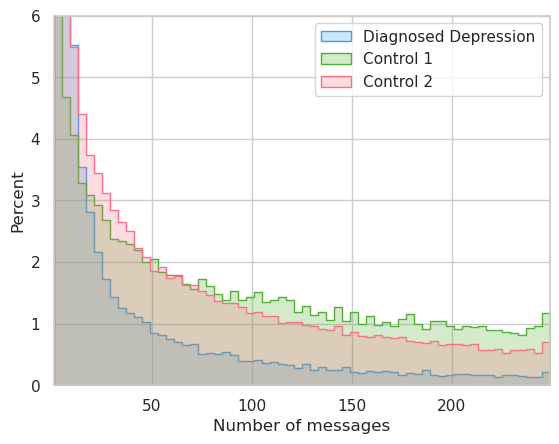

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Mulish")
sns.set_style("whitegrid")
pte = sns.color_palette("husl", 3)
sns.histplot(
    data=filtered_df, x="data", palette=pte, hue_order=[0,1,2], hue="category",
    binwidth=4, stat="percent", common_norm=False, element="step"
)
plt.xlim(1,249)
plt.ylim(0,6)
plt.xlabel("Number of messages")
plt.legend(labels=["Diagnosed Depression", "Control 1", "Control 2"])